In [14]:
print('A Data Visualization Project')

A Data Visualization Project


In [20]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn is a 'Python data visualization library based on matplotlib'

In [17]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/microsoft/Data-Science-For-Beginners/main/data/birds.csv')
df.head()


,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


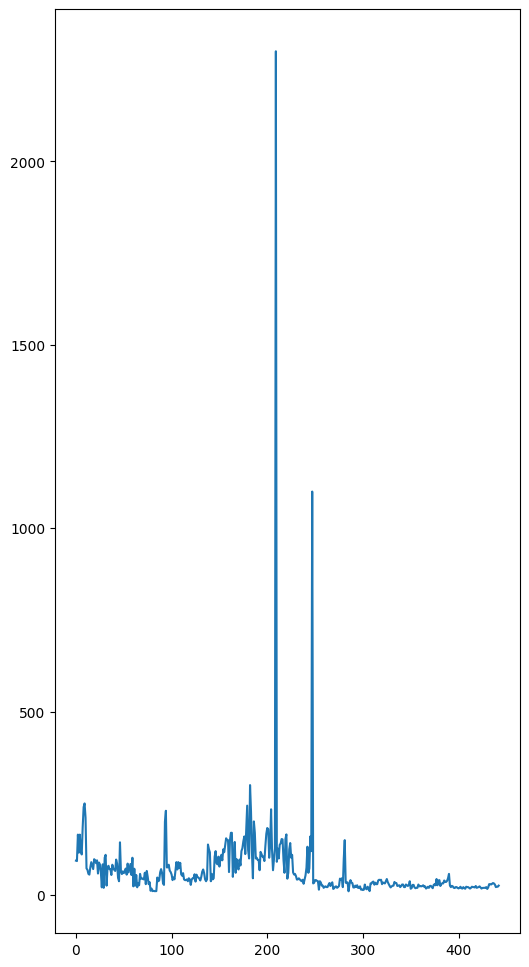

In [19]:
# Displaying quantity of birds by Wingspan

df["MaxWingspan"].plot()
plt.show()

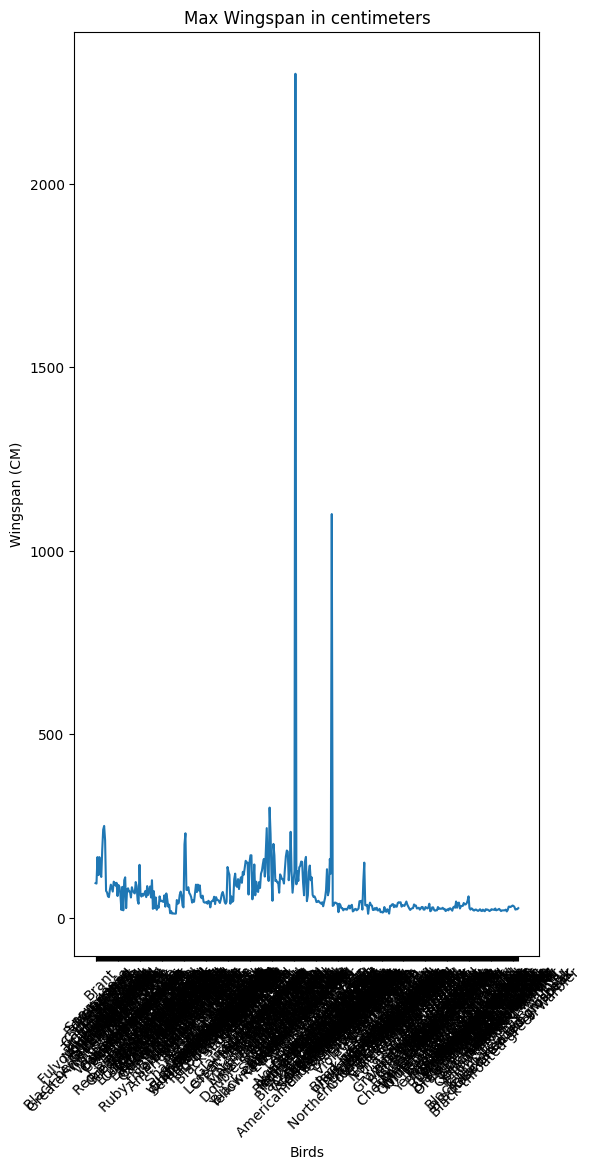

In [20]:
plt.title('Max Wingspan in centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')

# xticks runs how the name is displayed and in this case, we chose a 45 degree angle
plt.xticks(rotation=45)
x = df['Name']
y = df['MaxWingspan']

plt.plot(x, y)

plt.show()

In [8]:
# Checking for how many bats we have exactly

df.nunique()

Name                  443
ScientificName        443
Category               60
Order                  21
Family                 59
Genus                 238
ConservationStatus      6
MinLength              96
MaxLength             113
MinBodyMass           233
MaxBodyMass           271
MinWingspan           137
MaxWingspan           157
dtype: int64

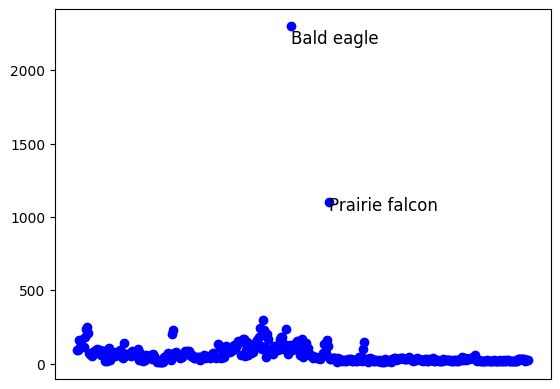

In [9]:
plt.tick_params(axis = "both", which = "both", labelbottom = False, bottom = False)

for i in range(len(df)):
	x = df["Name"][i]
	y = df["MaxWingspan"][i]
	plt.plot(x,y, "bo")
	if df["MaxWingspan"][i] > 500:
		plt.text(x,y * (1 - 0.05), df["Name"][i], fontsize=12)

plt.show()

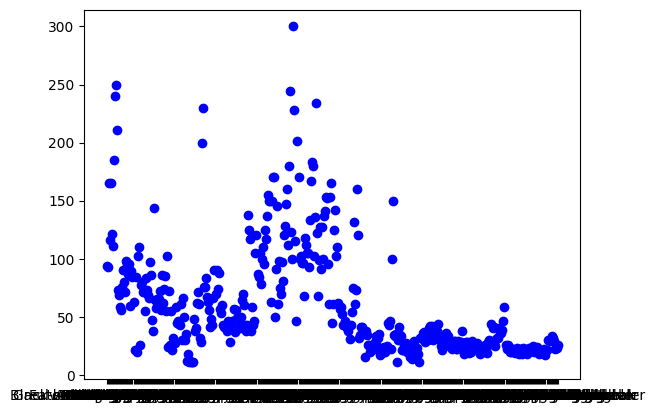

In [11]:
for i in range(len(df)):
	x = df["Name"][i]
	y = df["MaxWingspan"][i]
	if df["Name"][i] not in ['Bald eagle', 'Prairie falcon']:
		plt.plot(x,y, 'bo')

plt.show()

<AxesSubplot: title={'center': 'Birds'}, xlabel='Category'>

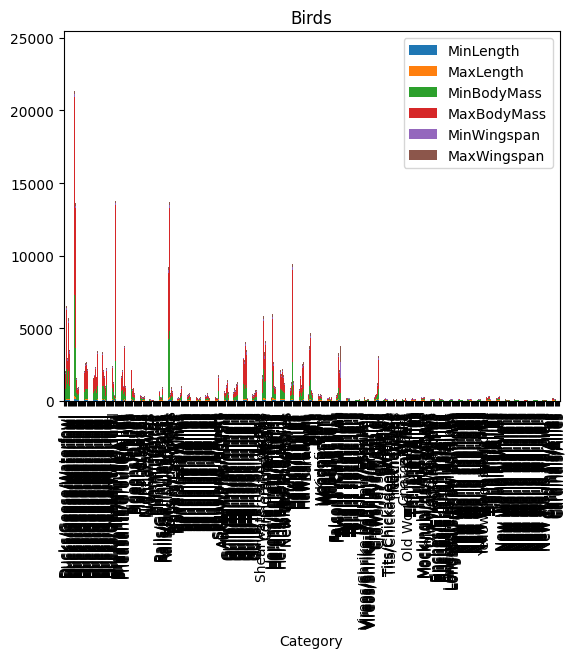

In [12]:
df.plot(x = 'Category', kind = 'bar', stacked = True, title = 'Birds')

<AxesSubplot: >

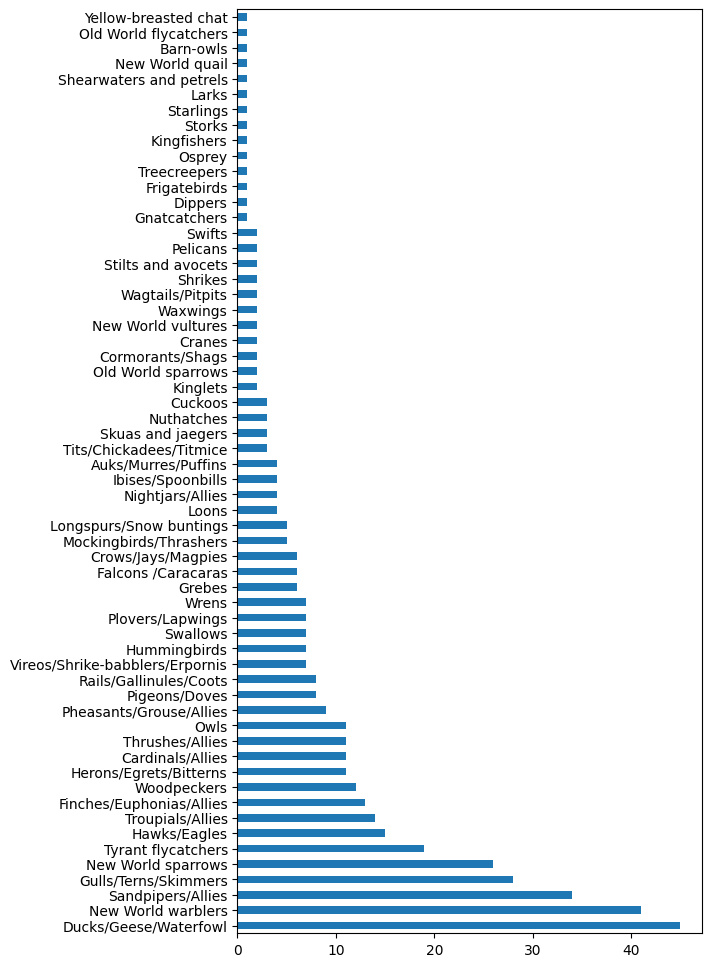

In [21]:
category_count = df.value_counts(df['Category'].values, sort= True)
plt.rcParams['figure.figsize'] = [6, 12]
category_count.plot.barh()

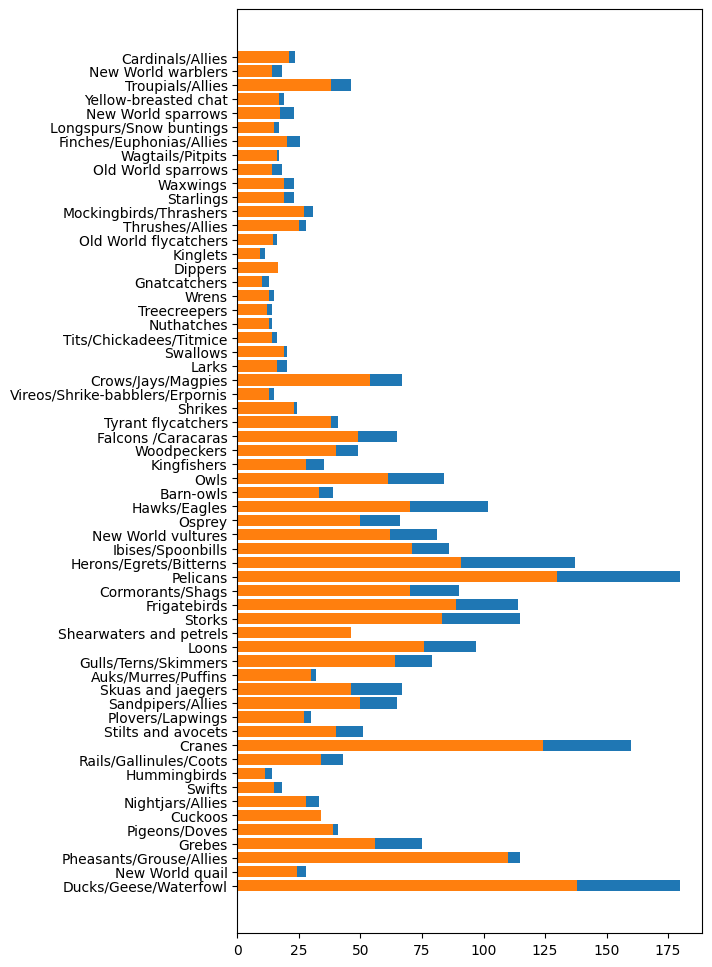

In [22]:
minLength = df['MinLength']
maxLength = df['MaxLength']
category = df['Category']

plt.barh(category, maxLength)
plt.barh(category, minLength)

plt.show()

<AxesSubplot: xlabel='MaxLength', ylabel='Order'>

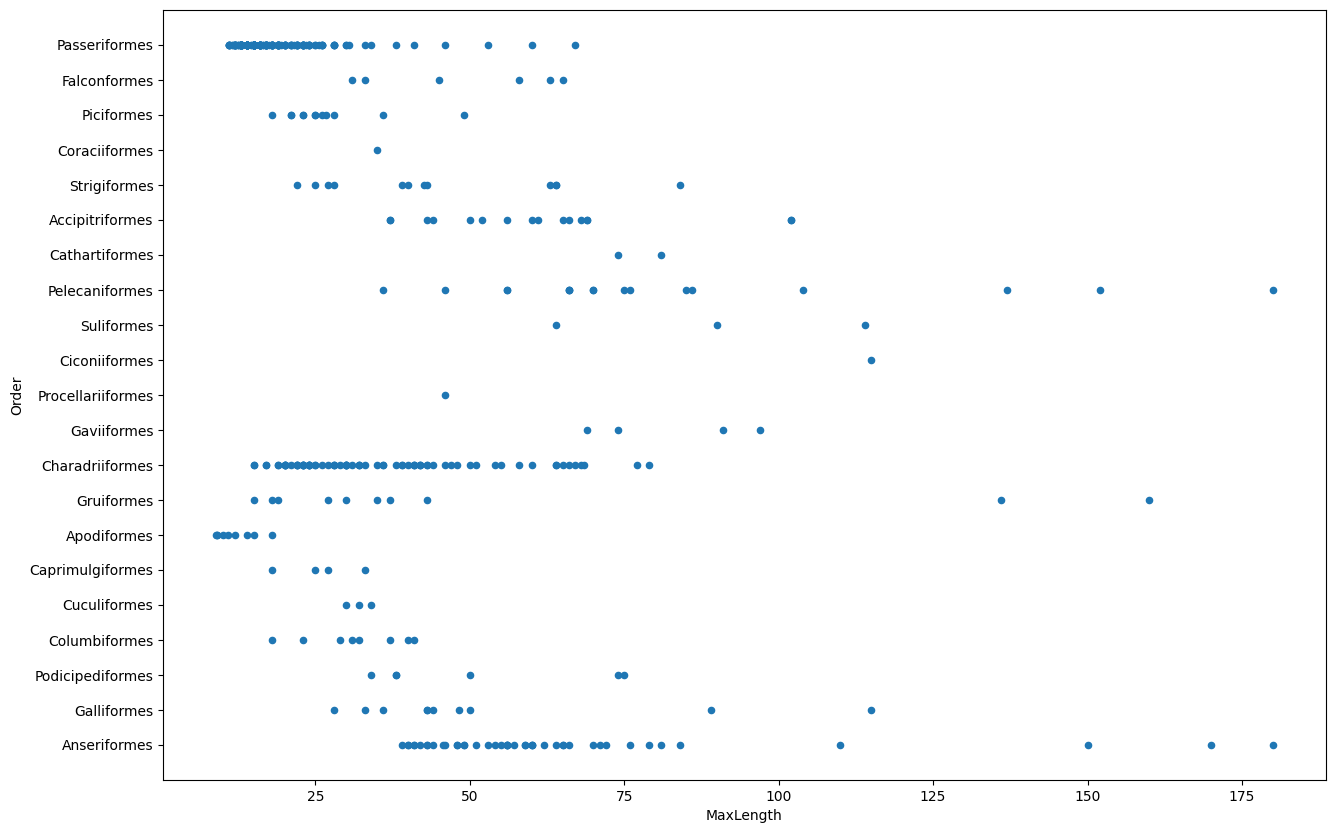

In [23]:
df.plot(kind = 'scatter', x = 'MaxLength', y = 'Order', figsize=(15, 10))

<AxesSubplot: ylabel='Frequency'>

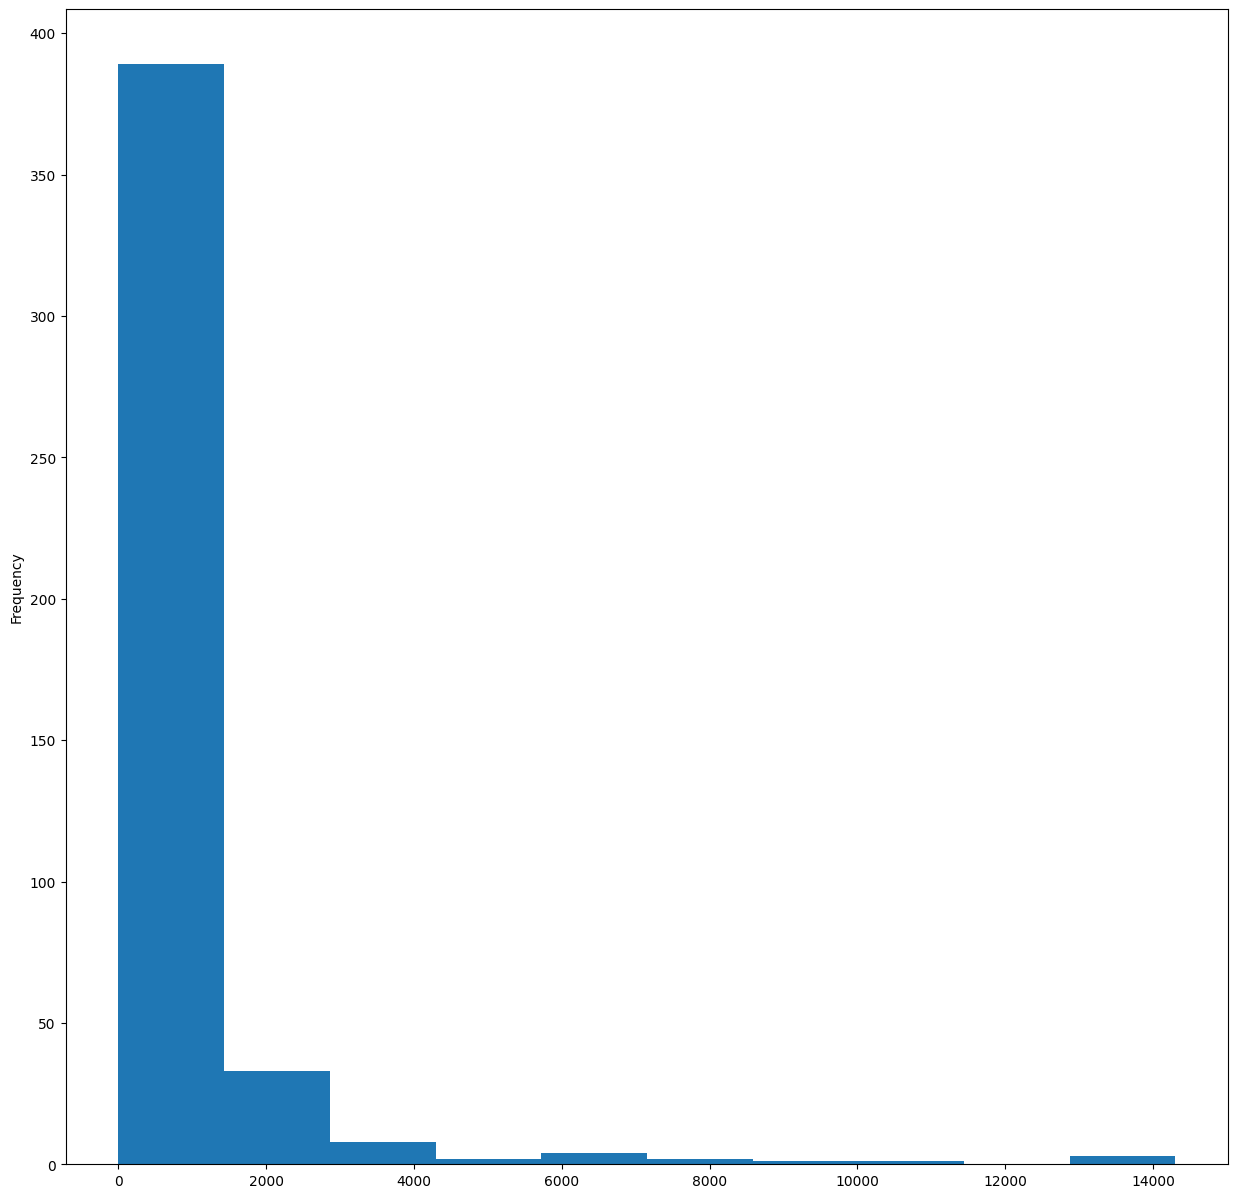

In [29]:
df['MaxBodyMass'].plot(kind = 'hist', figsize = (15, 15))

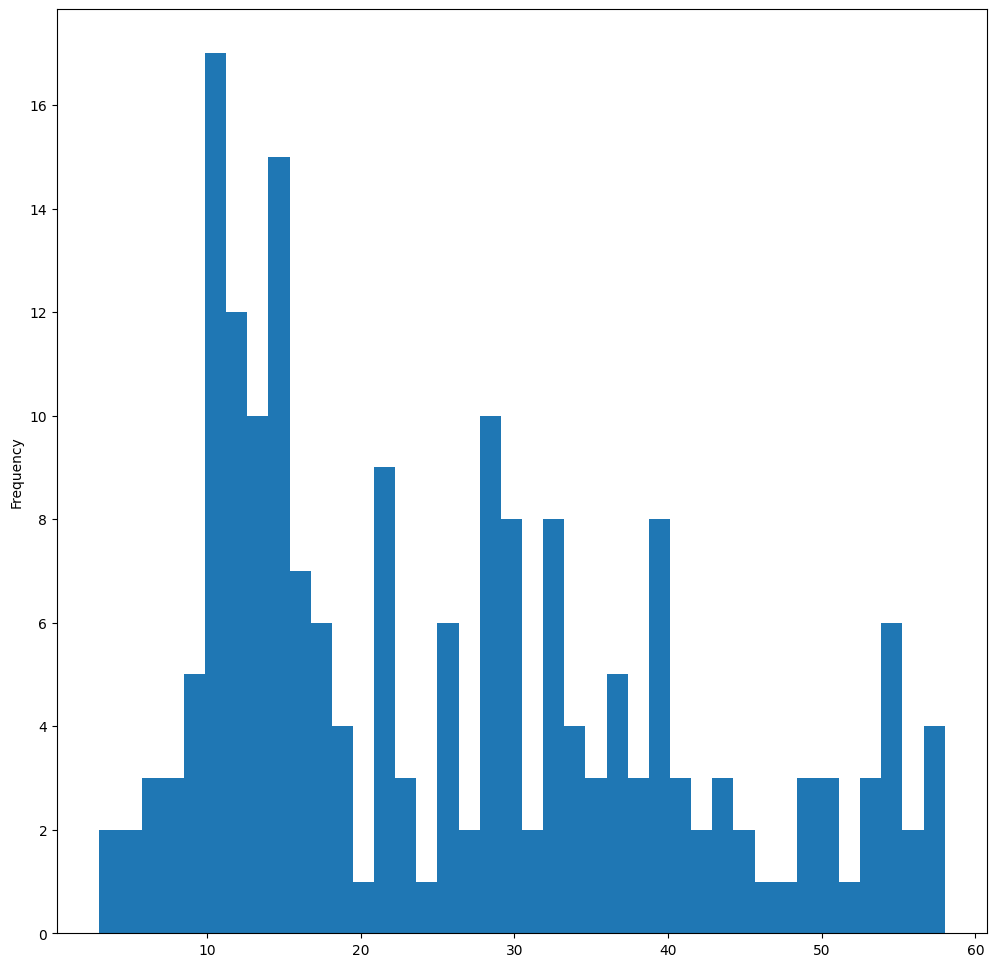

In [30]:
filtereddf = df[(df['MaxBodyMass'] > 1) & (df['MaxBodyMass'] < 60)]
filtereddf['MaxBodyMass'].plot(kind = 'hist', bins = 40, figsize = (12, 12))
plt.show()

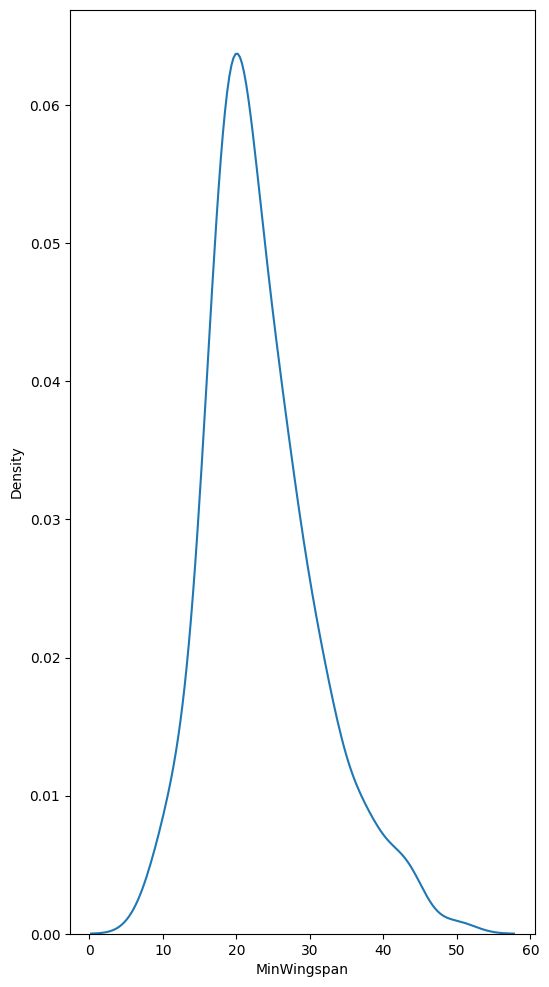

In [31]:
# Kde plot
sns.kdeplot(filtereddf ['MinWingspan'])
plt.show()

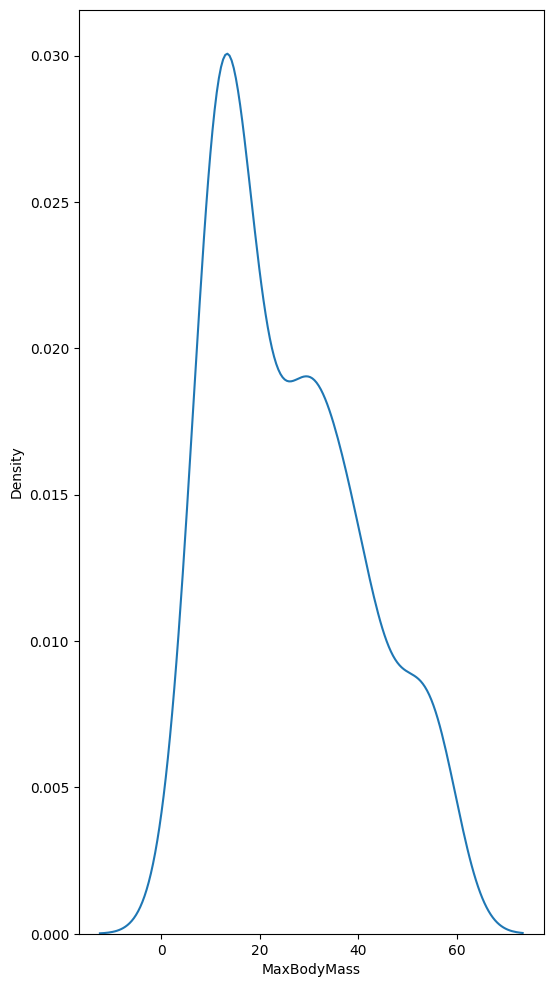

In [33]:
sns.kdeplot(filtereddf ['MaxBodyMass'])
plt.show()

/var/folders/15/h3kq6w3x739524jxwrhmm2g80000gn/T/ipykernel_1026/1639748614.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = filtereddf, x ='MaxBodyMass', hue = 'Order')
/var/folders/15/h3kq6w3x739524jxwrhmm2g80000gn/T/ipykernel_1026/1639748614.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = filtereddf, x ='MaxBodyMass', hue = 'Order')


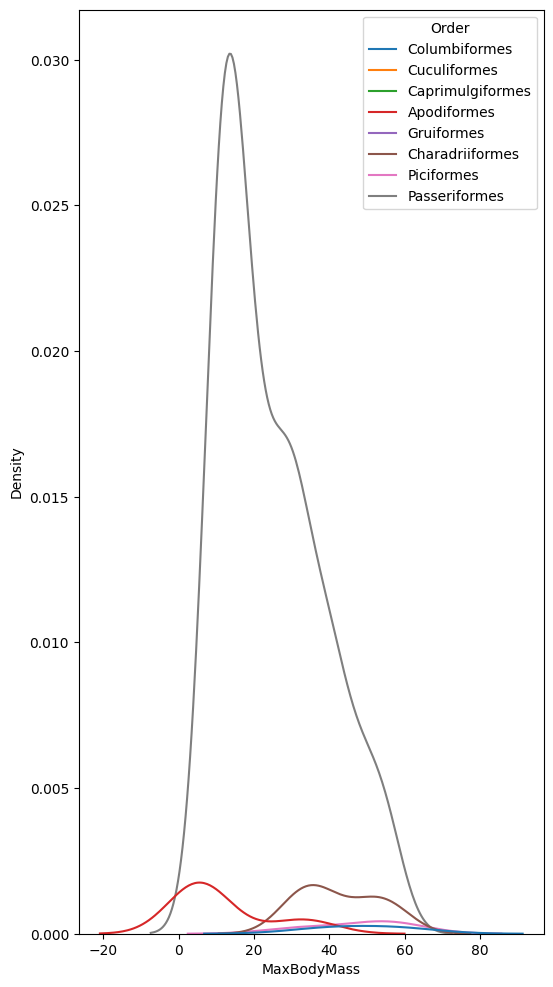

In [34]:
sns.kdeplot(data = filtereddf, x ='MaxBodyMass', hue = 'Order')
plt.show()

/var/folders/15/h3kq6w3x739524jxwrhmm2g80000gn/T/ipykernel_1026/717975842.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/var/folders/15/h3kq6w3x739524jxwrhmm2g80000gn/T/ipykernel_1026/717975842.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


<AxesSubplot: xlabel='MaxBodyMass', ylabel='Density'>

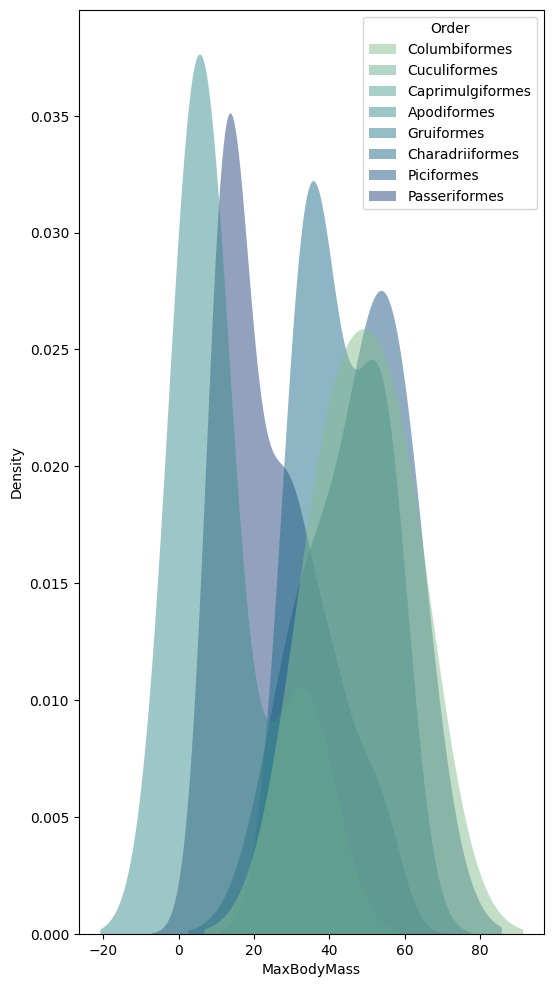

In [37]:
sns.kdeplot(
    data = filtereddf, x = 'MaxBodyMass', hue = 'Order',
    fill = True, common_norm = False, palette = 'crest',
    alpha = .5, linewidth = 0,
)

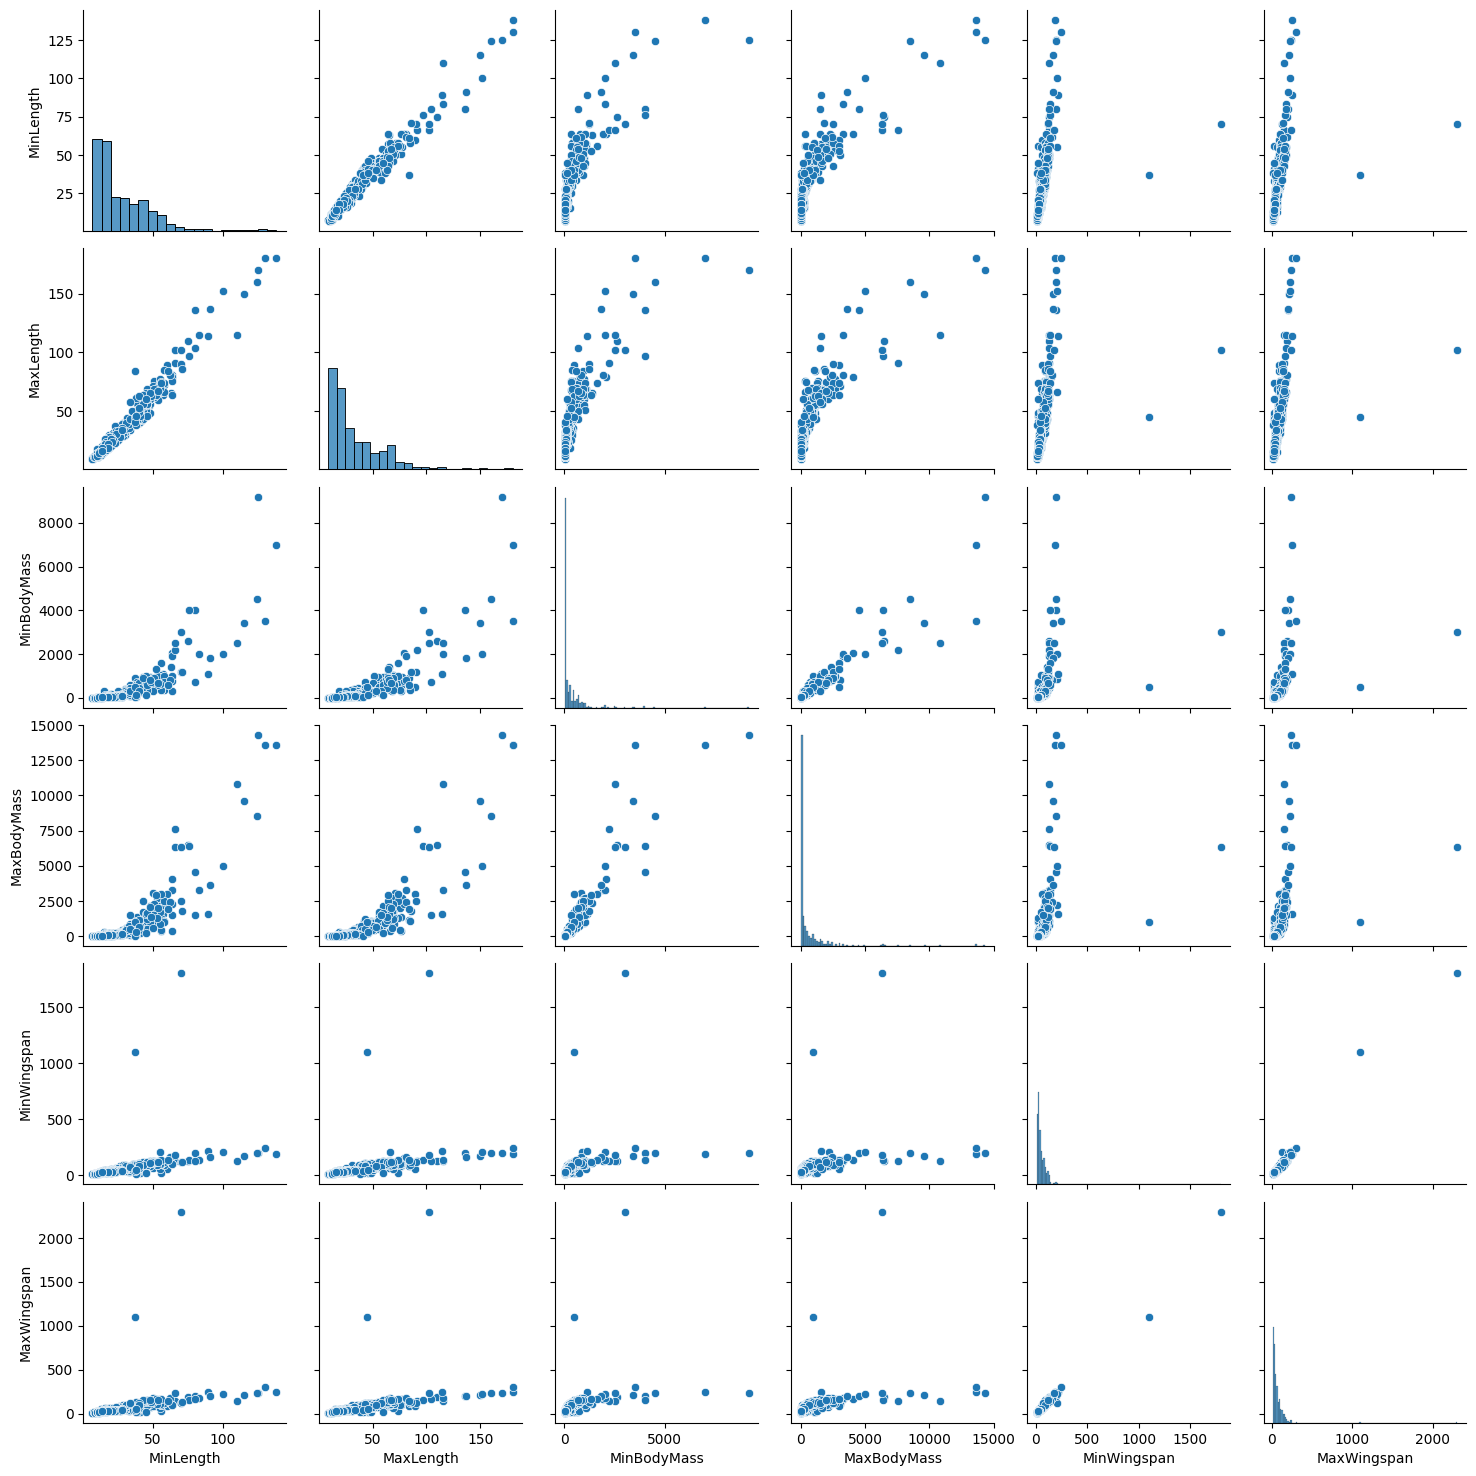

In [38]:
sns.pairplot(df)

In [39]:
df.corr()

/var/folders/15/h3kq6w3x739524jxwrhmm2g80000gn/T/ipykernel_1026/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
MinLength,1.000000,0.982290,0.813269,0.833797,0.429536,0.429874
MaxLength,0.982290,1.000000,0.824538,0.842841,0.442772,0.448038
MinBodyMass,0.813269,0.824538,1.000000,0.933166,0.401885,0.411347
MaxBodyMass,0.833797,0.842841,0.933166,1.000000,0.405611,0.421041
MinWingspan,0.429536,0.442772,0.401885,0.405611,1.000000,0.992093
MaxWingspan,0.429874,0.448038,0.411347,0.421041,0.992093,1.000000


/var/folders/15/h3kq6w3x739524jxwrhmm2g80000gn/T/ipykernel_1026/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

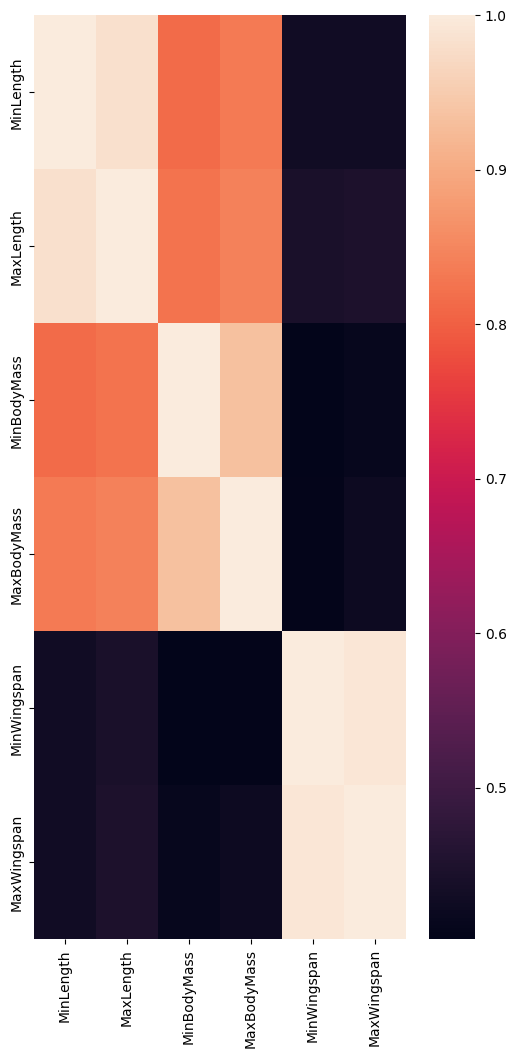

In [40]:
sns.heatmap(df.corr())

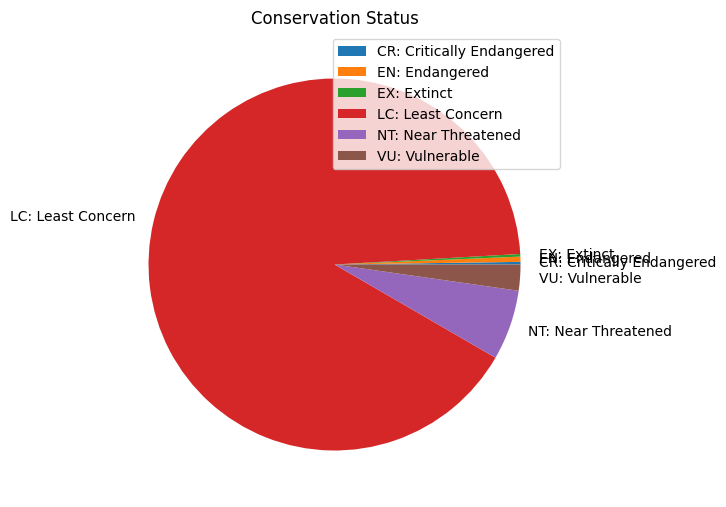

In [42]:
dfpie = df.groupby(['ConservationStatus']).count()
labels = ['CR: Critically Endangered', 'EN: Endangered', 'EX: Extinct', 'LC: Least Concern', 'NT: Near Threatened', 'VU: Vulnerable']
plt.pie(dfpie['Name'], labels = labels)
plt.legend()
plt.title('Conservation Status')
plt.show()

In [43]:
df.groupby(['ConservationStatus']).count()

,Name,ScientificName,Category,Order,Family,Genus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
ConservationStatus,,,,,,,,,,,,
CR,1,1,1,1,1,1,1,1,1,1,1,1
EN,2,2,2,2,2,2,2,2,2,2,2,2
EX,1,1,1,1,1,1,1,1,1,1,1,1
LC,402,402,402,402,402,402,402,402,402,402,402,402
NT,27,27,27,27,27,27,27,27,27,27,27,27
VU,10,10,10,10,10,10,10,10,10,10,10,10
